<a href="https://colab.research.google.com/github/rohandawar/-daysforcoding/blob/main/DetectAndCountVehiclesInPhotoCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook, I am trying to write the code for detecting & counting the vehicles in a picture or Video

In [16]:
# Import Libs

# General
from google.colab import drive
from PIL import Image
import cv2
import numpy as np
import pandas as pd

In [17]:
# Read the data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Check/Locate the data in the drive
!ls drive/MyDrive/DataSets/DetectAndCountVehicles/Data

bus.jpg  cars.png


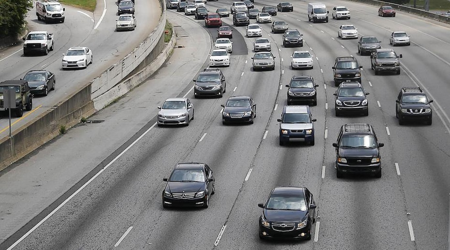

In [19]:
# read the data
image = Image.open('drive/MyDrive/DataSets/DetectAndCountVehicles/Data/cars.png')
image = image.resize((450,250))
image_arr = np.array(image)
image

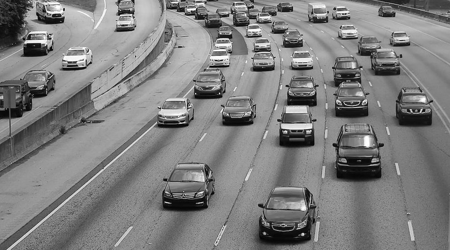

In [20]:
# Make the image gray Scale
grey = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

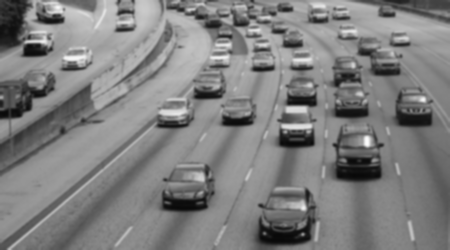

In [21]:
# Apply GussianBlur
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

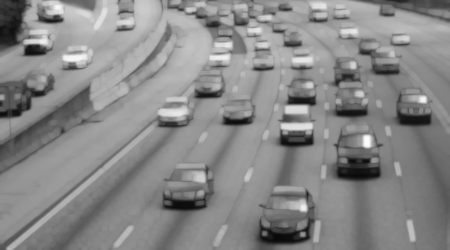

In [22]:
# Dilated the image
dilated = cv2.dilate(blur, np.ones((3,3)))
Image.fromarray(dilated)

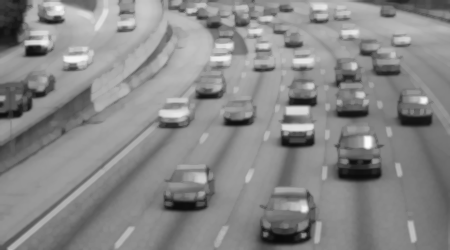

In [23]:
# Morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closing)

In [24]:
# load the haar cascade model
car_cascade_src = '/content/drive/MyDrive/DataSets/DetectAndCountVehicles/Required Files/cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1,1)

22 Cars Found


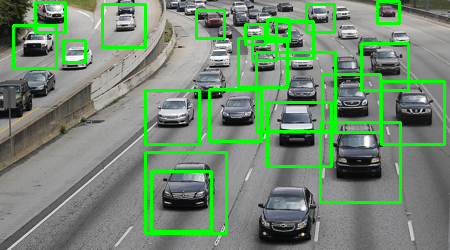

In [25]:
cnt = 0 
for (x,y,w,h) in cars:
  cv2.rectangle(image_arr, (x,y), (x+w,y+h), (0,255,0),2)
  cnt +=1
print(cnt, 'Cars Found')
Image.fromarray(image_arr)